In [30]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
newsgroups_train = fetch_20newsgroups(subset='train')

In [5]:
newsgroups_test = fetch_20newsgroups(subset='test')

In [9]:
newsgroups_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [11]:
newsgroups_test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [12]:
len(newsgroups_train["data"]) , len(newsgroups_train["target"])

(11314, 11314)

In [61]:
t = newsgroups_train["target"][400] 
n = newsgroups_train["target_names"][t]
(t,n)

(11, 'sci.crypt')

In [13]:
newsgroups_train["data"][0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [16]:
import re

def clean_text(text):
    '''
        Clean Text. Remove all special characters from text.
    '''
    cleaned_text = text.lower()
    cleaned_text = re.sub("[^a-z0-9]", " ", cleaned_text)
    cleaned_text = re.sub(" +", " ", cleaned_text)
    return cleaned_text


In [17]:
cleaned_data = [clean_text(text) for text in newsgroups_train["data"]]
cleaned_data[0]

'from lerxst wam umd edu where s my thing subject what car is this nntp posting host rac3 wam umd edu organization university of maryland college park lines 15 i was wondering if anyone out there could enlighten me on this car i saw the other day it was a 2 door sports car looked to be from the late 60s early 70s it was called a bricklin the doors were really small in addition the front bumper was separate from the rest of the body this is all i know if anyone can tellme a model name engine specs years of production where this car is made history or whatever info you have on this funky looking car please e mail thanks il brought to you by your neighborhood lerxst '

## Vectorize text

In [20]:
vectorizer = TfidfVectorizer(stop_words="english", min_df=5, max_df=0.75, ngram_range=(1,2), max_features=5000)

In [22]:
tfidf_vecs = vectorizer.fit_transform(cleaned_data)

In [23]:
tfidf_vecs = tfidf_vecs.toarray()
tfidf_vecs.shape

(11314, 5000)

#### Print the vocabs

In [27]:
len(vectorizer.vocabulary_)

5000

In [28]:
vocabs = sorted(vectorizer.vocabulary_)
with open("vocabs.txt" , "w")  as fout:
    for word in vocabs:
        fout.write("{}\n".format(word))


#### To PCA

In [62]:
n_components = 2000
pca_model  = PCA(n_components=n_components)
pca_vecs = pca_model.fit_transform(tfidf_vecs)
pca_vecs.shape

(11314, 2000)

In [63]:
pca_model_variance = pca_model.explained_variance_  
print("total_variance =", np.sum(pca_model_variance))

total_variance = 0.8505603284999368


In [64]:
cumulative_variance = np.cumsum(pca_model_variance)

In [67]:
cumulative_variance[999]

0.674477240263065

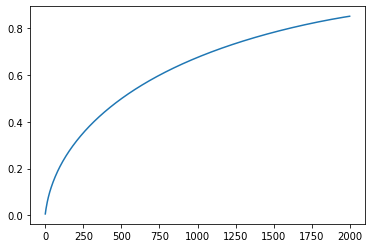

In [65]:
plt.plot(np.arange(n_components), cumulative_variance)

#### Create tSNE and plot

In [51]:
tsne_model = TSNE(n_components=2, perplexity=30)
tsne_vecs = tsne_model.fit_transform(pca_vecs)

### Craete Bokeh plot

In [52]:
# Import Bokeh modules for plotting
from bokeh.io import output, show
from bokeh.plotting import figure, curdoc, output_file, save
from bokeh.palettes import Viridis256, Plasma256
from bokeh.events import ButtonClick
from bokeh.models import ColumnDataSource, Div, CustomJS
from bokeh.models.widgets import Slider, Select, TextInput, Button, Div
from bokeh.layouts import layout, column, row, widgetbox

C:\Users\subhendu_mishra\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [53]:
color_set = np.random.choice(Plasma256, size=20, replace=False)
print(color_set)

['#18068B' '#5601A3' '#340498' '#D95969' '#F68E44' '#F89540' '#CA4678'
 '#7300A8' '#6C00A8' '#DA5A68' '#330497' '#47029F' '#21058F' '#5201A3'
 '#FA9D3A' '#A72197' '#A31D99' '#4A02A0' '#F1824C' '#EFF821']


In [54]:
colors = [color_set[i] for i in newsgroups_train["target"]]

In [55]:
p = figure(
        title="2D Cluster Plot",
        x_axis_label='Axis 1',
        y_axis_label='Axis 2',
        plot_width=900,
        plot_height=900
    )

In [56]:
p.scatter(x=tsne_vecs[:,0], y=tsne_vecs[:,1], color=colors)

GlyphRenderer(id='1038', ...)

In [57]:
show(p)